<a href="https://colab.research.google.com/github/kserdem/PERU_MachineLearning_with_NDVI_Analysis/blob/main/Peru_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BU PROJE UDA CONSULTING ŞİRKETİ BÜNYESİNDE PERU ÖZELİNDE NDVI ANALİZİ SONRASINDA MEYVE-SEBZE-MISIR KATEGORİLERİNİN ÖĞRENİLMESİ VE BAŞKA BÖLGENİN NDVI ANALİZ SONUÇLARI ÜZERİNDE TEST EDİLMESİ AMACILIĞIYLA YAPILMIŞTIR. YAPILAN TÜM İŞLEMLER PAYLAŞILMAMAKLA BERABER IMBALANCE VERİ SETİ UYGULAMALARINA ÖRNEK OLACAK ŞEKİLDE RESAMPLING YÖNTEMLERİ UYGULANMIŞTIR.

# KÜTÜPHANELERİN ve VERİ SETİNİN YÜKLENMESİ 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
#from catboost import CatBoostClassifier
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
data_peru=pd.read_excel('/content/drive/MyDrive/Colab_projects/Peru_TrainData.xlsx')
data_peru.head(2)

,Avg_mxNDVI,Avg_mxND_1,Avg_mxND_2,Avg_mxND_3,Avg_mxND_4,tipocosech
0,22550000000,37200000000,37375000000,40650000000,37125000000,Otros
1,9025000000,7925000000,11175000000,29300000000,27825000000,Frutas y verduras


In [4]:
data_peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Avg_mxNDVI  113 non-null    int64 
 1   Avg_mxND_1  113 non-null    int64 
 2   Avg_mxND_2  113 non-null    int64 
 3   Avg_mxND_3  113 non-null    int64 
 4   Avg_mxND_4  113 non-null    int64 
 5   tipocosech  113 non-null    object
dtypes: int64(5), object(1)
memory usage: 5.4+ KB


# **Scenario 1**
* **Tipocosech Replace to 0-1-2**

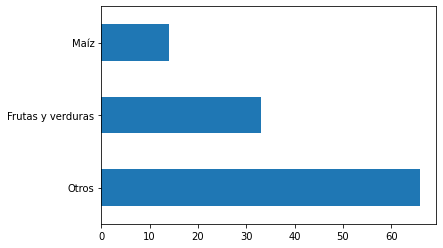

In [5]:
data_peru['tipocosech'].value_counts().plot.barh()


In [6]:
data_peru['tipocosech'].unique()

array(['Otros', 'Frutas y verduras', 'Maíz'], dtype=object)

In [7]:
data_peru['tipocosech']=data_peru['tipocosech'].replace('Otros',0)
data_peru['tipocosech']=data_peru['tipocosech'].replace('Frutas y verduras',1)
data_peru['tipocosech']=data_peru['tipocosech'].replace('Maíz',2)

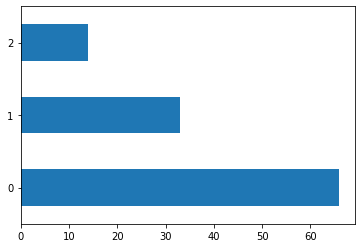

In [8]:
data_peru['tipocosech'].value_counts().plot.barh()

#Train-Test Resampling

In [9]:
!pip install imbalanced-learn

In [10]:
y=data_peru['tipocosech']
x=data_peru[['Avg_mxNDVI','Avg_mxND_1','Avg_mxND_2','Avg_mxND_3','Avg_mxND_4']]

In [11]:
import collections, numpy



* **OVER SAMPLİNG**




In [12]:
from imblearn.over_sampling import RandomOverSampler
ros =RandomOverSampler(random_state=123)
X_resampled_over, y_resampled_over = ros.fit_resample(x, y)

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_resampled_over, y_resampled_over,test_size=0.33, random_state=42)
print("X_train_over", X_train_over.shape)

print("y_train_over",y_train_over.shape)

print("X_test_over",X_test_over.shape)

print("y_test_over",y_test_over.shape)

X_train_over (132, 5)
y_train_over (132,)
X_test_over (66, 5)
y_test_over (66,)


In [14]:
print('Oversampling Y_train', collections.Counter(y_train_over))
print('Oversampling Y_test', collections.Counter(y_test_over))

Oversampling Y_train Counter({2: 45, 0: 44, 1: 43})
Oversampling Y_test Counter({1: 23, 0: 22, 2: 21})


* **UNDER SAMPLING**





In [15]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=123)
X_resampled_under, y_resampled_under = ros.fit_resample(x, y)

In [16]:

X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_resampled_under, y_resampled_under,test_size=0.25, random_state=42)
print("X_train_under", X_train_under.shape)

print("y_train_under",y_train_under.shape)

print("X_test_under",X_test_under.shape)

print("y_test_under",y_test_under.shape)

X_train_under (31, 5)
y_train_under (31,)
X_test_under (11, 5)
y_test_under (11,)


In [17]:
print('Undersampling Y_train', collections.Counter(y_train_under))
print('Undersampling Y_test', collections.Counter(y_test_under))

Undersampling Y_train Counter({2: 11, 0: 10, 1: 10})
Undersampling Y_test Counter({1: 4, 0: 4, 2: 3})


* **SMOTING**

In [18]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=12)
X_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

In [19]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resampled_smote, y_resampled_smote,test_size=0.25, random_state=42)
print("X_train_smote", X_train_smote.shape)

print("y_train_smote",y_train_smote.shape)

print("X_test_smote",X_test_smote.shape)

print("y_test_smote",y_test_smote.shape)

X_train_smote (148, 5)
y_train_smote (148,)
X_test_smote (50, 5)
y_test_smote (50,)


In [20]:
print('Smooting Y_train', collections.Counter(y_train_smote))
print('Smooting Y_test', collections.Counter(y_test_smote))

Smooting Y_train Counter({2: 52, 0: 49, 1: 47})
Smooting Y_test Counter({1: 19, 0: 17, 2: 14})


 * **HAM DATA**

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42,shuffle=True)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (84, 5)
y_train (84,)
X_test (29, 5)
y_test (29,)


In [22]:
print('Ham Data Y_train',y_train.value_counts())
print('Ham Data Y_test',y_test.value_counts())

Ham Data Y_train 0    50
1    25
2     9
Name: tipocosech, dtype: int64
Ham Data Y_test 0    16
1     8
2     5
Name: tipocosech, dtype: int64


#Algoritmalar

#Lojistik Regresyon

**1) Ham Data**

In [23]:
loj=LogisticRegression(solver='liblinear')
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=loj_model.predict(X_test)
accuracy_score(y_test,loj_model.predict(X_test))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.88      0.68        16
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         5

    accuracy                           0.52        29
   macro avg       0.27      0.33      0.28        29
weighted avg       0.38      0.52      0.42        29



In [25]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.5166666666666666

**2) Over sampling**

In [26]:
loj_over=LogisticRegression(solver='liblinear').fit(X_train_over,y_train_over)
y_pred_lO=loj_over.predict(X_test_over)
accuracy_score(y_test_over,loj_over.predict(X_test_over))
print(classification_report(y_test_over,y_pred_lO))

              precision    recall  f1-score   support

           0       0.38      0.23      0.29        22
           1       0.45      0.57      0.50        23
           2       0.46      0.52      0.49        21

    accuracy                           0.44        66
   macro avg       0.43      0.44      0.42        66
weighted avg       0.43      0.44      0.43        66



In [27]:
cross_val_score(loj_over,X_test_over,y_test_over,cv=10).mean()

0.48571428571428565

**3) Under Sampling**

In [28]:
loj_under=LogisticRegression(solver='liblinear').fit(X_train_under,y_train_under)
y_pred_lU=loj_under.predict(X_test_under)
accuracy_score(y_test_under,loj_under.predict(X_test_under))
print(classification_report(y_test_under,y_pred_lU))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.33      0.50      0.40         4
           2       0.00      0.00      0.00         3

    accuracy                           0.36        11
   macro avg       0.28      0.33      0.30        11
weighted avg       0.30      0.36      0.33        11



**4) Smoote**

In [29]:
loj_smote=LogisticRegression(solver='liblinear').fit(X_train_smote,y_train_smote)
y_pred_lS=loj_smote.predict(X_test_smote)
accuracy_score(y_test_smote,loj_smote.predict(X_test_smote))
print(classification_report(y_test_smote,y_pred_lS))

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        17
           1       0.62      0.68      0.65        19
           2       0.36      0.36      0.36        14

    accuracy                           0.50        50
   macro avg       0.48      0.48      0.48        50
weighted avg       0.49      0.50      0.50        50



In [30]:
cross_val_score(loj_smote,X_test_smote,y_test_smote,cv=10).mean()

0.45999999999999996

#Random Forest

**1) Ham Data**

In [31]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred=rf_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        16
           1       0.60      0.38      0.46         8
           2       0.00      0.00      0.00         5

    accuracy                           0.59        29
   macro avg       0.40      0.42      0.39        29
weighted avg       0.50      0.59      0.52        29



In [32]:
cross_val_score(rf_model,X_test,y_test,cv=10).mean()

0.36666666666666664

**2) OVER SAMP**

In [33]:
rf_OVER = RandomForestClassifier().fit(X_train_over, y_train_over)
y_pred_RO = rf_OVER.predict(X_test_over)
accuracy_score(y_test_over, y_pred_RO)
print(classification_report(y_test_over,y_pred_RO))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        22
           1       0.68      0.65      0.67        23
           2       0.75      1.00      0.86        21

    accuracy                           0.67        66
   macro avg       0.64      0.67      0.65        66
weighted avg       0.64      0.67      0.65        66



In [34]:
cross_val_score(rf_OVER,X_test_over,y_test_over,cv=10).mean()

0.638095238095238

**3) UNDER SAMP**

In [35]:
rf_under = RandomForestClassifier().fit(X_train_under, y_train_under)
y_pred_RU = rf_under.predict(X_test_under)
accuracy_score(y_test_under, y_pred_RU)
print(classification_report(y_test_under,y_pred_RU))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.67      0.50      0.57         4
           2       0.50      0.33      0.40         3

    accuracy                           0.45        11
   macro avg       0.50      0.44      0.46        11
weighted avg       0.50      0.45      0.46        11



**4) SMOOTE**

In [36]:
rf_smote = RandomForestClassifier(random_state=1).fit(X_train_smote, y_train_smote)
y_pred_RS = rf_smote.predict(X_test_smote)
accuracy_score(y_test_smote, y_pred_RS)
print(classification_report(y_test_smote,y_pred_RS))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50        17
           1       0.79      0.79      0.79        19
           2       0.62      0.71      0.67        14

    accuracy                           0.66        50
   macro avg       0.65      0.66      0.65        50
weighted avg       0.66      0.66      0.66        50



In [37]:
cross_val_score(rf_smote,X_test_smote,y_test_smote,cv=10).mean()

0.5199999999999999

#Naive Bayes

**1) Ham Data**

In [38]:
nb_model = GaussianNB().fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.50      0.38      0.43         8
           2       0.50      0.20      0.29         5

    accuracy                           0.55        29
   macro avg       0.52      0.44      0.45        29
weighted avg       0.54      0.55      0.53        29



In [39]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.4833333333333333

**2) OVER SAMP**

In [40]:
nb_model_O = GaussianNB().fit(X_train_over, y_train_over)
y_pred_NBO = nb_model_O.predict(X_test_over)
accuracy_score(y_test_over, y_pred_NBO)
print(classification_report(y_test_over,y_pred_NBO))

              precision    recall  f1-score   support

           0       0.38      0.27      0.32        22
           1       0.65      0.48      0.55        23
           2       0.39      0.62      0.48        21

    accuracy                           0.45        66
   macro avg       0.47      0.46      0.45        66
weighted avg       0.48      0.45      0.45        66



In [41]:
cross_val_score(nb_model_O,X_test_over,y_test_over,cv=10).mean()

0.4976190476190475

**3) UNDER SAMP**

In [42]:
nb_model_U = GaussianNB().fit(X_train_under, y_train_under)
y_pred_NBU = nb_model_U.predict(X_test_under)
accuracy_score(y_test_under, y_pred_NBU)
print(classification_report(y_test_under,y_pred_NBU))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.57      1.00      0.73         4
           2       0.50      0.67      0.57         3

    accuracy                           0.55        11
   macro avg       0.36      0.56      0.43        11
weighted avg       0.34      0.55      0.42        11



**4) SMOTE**

In [43]:
nb_model_S = GaussianNB().fit(X_train_smote, y_train_smote)
y_pred_NBS = nb_model_S.predict(X_test_smote)
accuracy_score(y_test_smote, y_pred_NBS)
print(classification_report(y_test_smote,y_pred_NBS))

              precision    recall  f1-score   support

           0       0.25      0.18      0.21        17
           1       0.75      0.47      0.58        19
           2       0.35      0.64      0.45        14

    accuracy                           0.42        50
   macro avg       0.45      0.43      0.41        50
weighted avg       0.47      0.42      0.42        50



In [44]:
cross_val_score(nb_model_S,X_test_smote,y_test_smote,cv=10).mean()

0.5

#LGBM

**1) HAM DATA**

In [45]:
lgbm_samp=LGBMClassifier().fit(X_train, y_train)
y_pred_= lgbm_samp.predict(X_test)
print(classification_report(y_test,y_pred_))
cross_val_score(lgbm_samp,X_test,y_test,cv=10).mean()

              precision    recall  f1-score   support

           0       0.54      0.81      0.65        16
           1       0.50      0.25      0.33         8
           2       0.00      0.00      0.00         5

    accuracy                           0.52        29
   macro avg       0.35      0.35      0.33        29
weighted avg       0.44      0.52      0.45        29



0.5499999999999999

In [46]:
cross_val_score(lgbm_samp,X_test,y_test,cv=10).mean()

0.5499999999999999

**2) OVER SAMP**

In [47]:
lgbm_O=LGBMClassifier().fit(X_train_over, y_train_over)
y_pred_= lgbm_O.predict(X_test_over)
print(classification_report(y_test_over,y_pred_))
cross_val_score(lgbm_O,X_test_over,y_test_over,cv=10).mean()

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        22
           1       0.78      0.61      0.68        23
           2       0.66      1.00      0.79        21

    accuracy                           0.70        66
   macro avg       0.71      0.70      0.68        66
weighted avg       0.71      0.70      0.68        66



0.4738095238095238

**3) SMOTE**

In [48]:
lgbm_S=LGBMClassifier().fit(X_train_smote, y_train_smote)
y_pred_= lgbm_S.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred_))
cross_val_score(lgbm_S,X_test_smote,y_test_smote,cv=10).mean()

              precision    recall  f1-score   support

           0       0.44      0.24      0.31        17
           1       0.70      0.84      0.76        19
           2       0.50      0.64      0.56        14

    accuracy                           0.58        50
   macro avg       0.55      0.57      0.54        50
weighted avg       0.56      0.58      0.55        50



0.4800000000000001

# CatBoost

In [49]:
pip install CatBoost

     |████████████████████████████████| 67.3MB 60kB/s 


In [50]:
from catboost import CatBoostClassifier

**1) HAM DATA**

In [51]:
model = CatBoostClassifier().fit(X_train, y_train)
y_pred_model = model.predict(X_test)
print(classification_report(y_test,y_pred_model ))

Learning rate set to 0.069737
0:	learn: 1.0739649	total: 48.6ms	remaining: 48.6s
1:	learn: 1.0568412	total: 50.2ms	remaining: 25s
2:	learn: 1.0356568	total: 51.7ms	remaining: 17.2s
3:	learn: 1.0155538	total: 53.4ms	remaining: 13.3s
4:	learn: 0.9970376	total: 54.9ms	remaining: 10.9s
5:	learn: 0.9806306	total: 56.5ms	remaining: 9.35s
6:	learn: 0.9665450	total: 58.1ms	remaining: 8.24s
7:	learn: 0.9543493	total: 59.5ms	remaining: 7.38s
8:	learn: 0.9432124	total: 61.1ms	remaining: 6.73s
9:	learn: 0.9309862	total: 62.7ms	remaining: 6.2s
10:	learn: 0.9193355	total: 64.2ms	remaining: 5.77s
11:	learn: 0.9059641	total: 65.7ms	remaining: 5.41s
12:	learn: 0.8958233	total: 67.2ms	remaining: 5.1s
13:	learn: 0.8858155	total: 68.7ms	remaining: 4.84s
14:	learn: 0.8774656	total: 70.3ms	remaining: 4.61s
15:	learn: 0.8687118	total: 71.8ms	remaining: 4.42s
16:	learn: 0.8599699	total: 73.3ms	remaining: 4.24s
17:	learn: 0.8532242	total: 74.7ms	remaining: 4.08s
18:	learn: 0.8462810	total: 77.6ms	remaining: 4.

**2) OVER SAMP**

In [52]:
model_O = CatBoostClassifier().fit(X_train_over, y_train_over)
y_pred_model = model_O.predict(X_test_over)
print(classification_report(y_test_over,y_pred_model ))


Learning rate set to 0.071363
0:	learn: 1.0802879	total: 1.67ms	remaining: 1.67s
1:	learn: 1.0620570	total: 3.23ms	remaining: 1.61s
2:	learn: 1.0464858	total: 4.73ms	remaining: 1.57s
3:	learn: 1.0277213	total: 6.94ms	remaining: 1.73s
4:	learn: 1.0073166	total: 8.48ms	remaining: 1.69s
5:	learn: 0.9942260	total: 10.8ms	remaining: 1.79s
6:	learn: 0.9765346	total: 14.3ms	remaining: 2.03s
7:	learn: 0.9616418	total: 16.6ms	remaining: 2.06s
8:	learn: 0.9474076	total: 18.1ms	remaining: 2s
9:	learn: 0.9363782	total: 19.7ms	remaining: 1.95s
10:	learn: 0.9238113	total: 21.2ms	remaining: 1.91s
11:	learn: 0.9120552	total: 22.7ms	remaining: 1.87s
12:	learn: 0.9024176	total: 24.3ms	remaining: 1.84s
13:	learn: 0.8847957	total: 25.8ms	remaining: 1.82s
14:	learn: 0.8747546	total: 27.4ms	remaining: 1.8s
15:	learn: 0.8607470	total: 29ms	remaining: 1.78s
16:	learn: 0.8517615	total: 30.4ms	remaining: 1.76s
17:	learn: 0.8421841	total: 32ms	remaining: 1.74s
18:	learn: 0.8312091	total: 33.5ms	remaining: 1.73s


In [53]:
cross_val_score(model_O,X_test_smote,y_test_smote,cv=10).mean()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
4:	learn: 1.0074833	total: 5.12ms	remaining: 1.02s
5:	learn: 0.9920477	total: 5.73ms	remaining: 949ms
6:	learn: 0.9769194	total: 6.75ms	remaining: 958ms
7:	learn: 0.9604708	total: 7.77ms	remaining: 963ms
8:	learn: 0.9458409	total: 8.79ms	remaining: 968ms
9:	learn: 0.9353512	total: 9.8ms	remaining: 970ms
10:	learn: 0.9199251	total: 10.8ms	remaining: 974ms
11:	learn: 0.9115624	total: 11.8ms	remaining: 973ms
12:	learn: 0.8993631	total: 18.2ms	remaining: 1.38s
13:	learn: 0.8890473	total: 19.2ms	remaining: 1.35s
14:	learn: 0.8719198	total: 20.9ms	remaining: 1.37s
15:	learn: 0.8600026	total: 24.1ms	remaining: 1.48s
16:	learn: 0.8492878	total: 24.8ms	remaining: 1.44s
17:	learn: 0.8377689	total: 26.5ms	remaining: 1.45s
18:	learn: 0.8298761	total: 27.3ms	remaining: 1.41s
19:	learn: 0.8213074	total: 28.1ms	remaining: 1.38s
20:	learn: 0.8120721	total: 28.9ms	remaining: 1.35s
21:	learn: 0.8029965	total: 29.7ms	remaining: 1.32s
22:	learn: 0.7943612	tot

0.44000000000000006

**3) SMOTE DATA**

In [54]:
model_S = CatBoostClassifier().fit(X_train_smote, y_train_smote)
y_pred_model = model_S.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred_model ))

Learning rate set to 0.071781
0:	learn: 1.0855043	total: 3.1ms	remaining: 3.1s
1:	learn: 1.0695360	total: 5.48ms	remaining: 2.73s
2:	learn: 1.0541252	total: 7.79ms	remaining: 2.59s
3:	learn: 1.0391436	total: 10.1ms	remaining: 2.51s
4:	learn: 1.0235601	total: 12.5ms	remaining: 2.48s
5:	learn: 1.0101330	total: 14.8ms	remaining: 2.45s
6:	learn: 0.9958635	total: 17.1ms	remaining: 2.42s
7:	learn: 0.9832885	total: 19.3ms	remaining: 2.4s
8:	learn: 0.9722151	total: 21.7ms	remaining: 2.39s
9:	learn: 0.9606271	total: 24.1ms	remaining: 2.39s
10:	learn: 0.9511502	total: 26.4ms	remaining: 2.37s
11:	learn: 0.9435499	total: 28.7ms	remaining: 2.36s
12:	learn: 0.9338235	total: 31.1ms	remaining: 2.36s
13:	learn: 0.9232016	total: 33.4ms	remaining: 2.35s
14:	learn: 0.9146602	total: 35.7ms	remaining: 2.35s
15:	learn: 0.9055536	total: 38ms	remaining: 2.34s
16:	learn: 0.8962256	total: 40.3ms	remaining: 2.33s
17:	learn: 0.8865809	total: 42.7ms	remaining: 2.33s
18:	learn: 0.8797208	total: 45ms	remaining: 2.32s

# SCENERIO1 DEĞERLENDİRMELER


> **YAPILAN İŞLEMLER:**


* TİPOCOSECH Değişken kategorileri 0-1-2 olarak değiştirildi.
* Veri seti imbalance olduğu için resampling yöntemleri uygulandı. (Resampling, Smoote, Undersampling)


> **UYGULANAN MODELLER:**


* Lojistik Regresyon
* Random Forest
* Naive Bayes

* LGBM
* CatBoost



> **Uygulamalara Devam Edilecek Veri Setleri:**
* Over Sampling
* Ham Data


> **İyileştirilme Yapılacak Modeller:**
* Random Forest (Over Samp)
* LGBM (Ham Data)



> **NOT: Daha sonra Over Sampling ve Smote Data için Standartlaştırma işlemi uygulanacak!!**





# SCENERIO 2
* Tiposech Replace to 0-1
* Otros- Maiz == 0
* Frutas y verduras ==1

In [55]:
data_peru_2= data_peru.copy()

In [56]:
data_peru_2['tipocosech']=data_peru_2['tipocosech'].replace('Otros',0)
data_peru_2['tipocosech']=data_peru_2['tipocosech'].replace('Frutas y verduras',1)
data_peru_2['tipocosech']=data_peru_2['tipocosech'].replace(2,0)

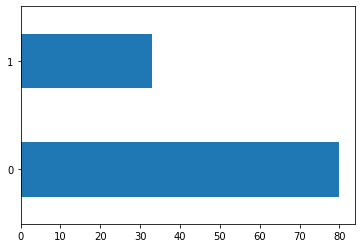

In [57]:
data_peru_2['tipocosech'].value_counts().plot.barh()

# Train-Test Resampling

In [58]:
y=data_peru_2['tipocosech']
x=data_peru_2[['Avg_mxNDVI','Avg_mxND_1','Avg_mxND_2','Avg_mxND_3','Avg_mxND_4']]



* **OVER SAMPLİNG**




In [59]:
from imblearn.over_sampling import RandomOverSampler
ros =RandomOverSampler(random_state=123)
X_resampled_over, y_resampled_over = ros.fit_resample(x, y)

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_resampled_over, y_resampled_over,test_size=0.22, random_state=42)
print("X_train_over", X_train_over.shape)

print("y_train_over",y_train_over.shape)

print("X_test_over",X_test_over.shape)

print("y_test_over",y_test_over.shape)

X_train_over (124, 5)
y_train_over (124,)
X_test_over (36, 5)
y_test_over (36,)


In [61]:
print('Oversampling Y_train', collections.Counter(y_train_over))
print('Oversampling Y_test', collections.Counter(y_test_over))

Oversampling Y_train Counter({0: 62, 1: 62})
Oversampling Y_test Counter({1: 18, 0: 18})


* **SMOTING**

In [62]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=12)
X_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

In [63]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_resampled_smote, y_resampled_smote,test_size=0.25, random_state=42)
print("X_train_smote", X_train_smote.shape)

print("y_train_smote",y_train_smote.shape)

print("X_test_smote",X_test_smote.shape)

print("y_test_smote",y_test_smote.shape)

X_train_smote (120, 5)
y_train_smote (120,)
X_test_smote (40, 5)
y_test_smote (40,)


In [64]:
print('Smooting Y_train', collections.Counter(y_train_smote))
print('Smooting Y_test', collections.Counter(y_test_smote))

Smooting Y_train Counter({1: 61, 0: 59})
Smooting Y_test Counter({0: 21, 1: 19})


 * **HAM DATA**

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (79, 5)
y_train (79,)
X_test (34, 5)
y_test (34,)


In [66]:
print('Ham Data Y_train',y_train.value_counts())
print('Ham Data Y_test',y_test.value_counts())

Ham Data Y_train 0    55
1    24
Name: tipocosech, dtype: int64
Ham Data Y_test 0    25
1     9
Name: tipocosech, dtype: int64


#Algoritmalar

#Lojistik Regresyon

In [67]:
loj=LogisticRegression(solver='liblinear')
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred=loj_model.predict(X_test)
accuracy_score(y_test,loj_model.predict(X_test))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.33      0.11      0.17         9

    accuracy                           0.71        34
   macro avg       0.54      0.52      0.49        34
weighted avg       0.63      0.71      0.65        34



In [69]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.6833333333333333

**2) Over sampling**

In [70]:
loj_over=LogisticRegression(solver='liblinear').fit(X_train_over,y_train_over)
y_pred_lO=loj_over.predict(X_test_over)
accuracy_score(y_test_over,loj_over.predict(X_test_over))
print(classification_report(y_test_over,y_pred_lO))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        18
           1       0.44      0.44      0.44        18

    accuracy                           0.44        36
   macro avg       0.44      0.44      0.44        36
weighted avg       0.44      0.44      0.44        36



In [71]:
cross_val_score(loj_over,X_test_over,y_test_over,cv=10).mean()

0.5416666666666666

* **3) SMOTE**

In [72]:
loj_smote=LogisticRegression(solver='liblinear').fit(X_train_smote,y_train_smote)
y_pred_lS=loj_smote.predict(X_test_smote)
accuracy_score(y_test_smote,loj_smote.predict(X_test_smote))
print(classification_report(y_test_smote,y_pred_lS))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45        21
           1       0.35      0.32      0.33        19

    accuracy                           0.40        40
   macro avg       0.39      0.40      0.39        40
weighted avg       0.40      0.40      0.40        40



In [73]:
cross_val_score(loj_smote,X_test_smote,y_test_smote,cv=10).mean()

0.475

#Random Forest

**1) Ham Data**

In [74]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred=rf_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
cross_val_score(rf_model,X_test,y_test,cv=10).mean()

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.50      0.33      0.40         9

    accuracy                           0.74        34
   macro avg       0.64      0.61      0.62        34
weighted avg       0.71      0.74      0.72        34



0.7583333333333334

In [75]:
cross_val_score(rf_model,X_test,y_test,cv=10).mean()

0.7583333333333334

**2) OVER SAMP**

In [76]:
rf_OVER = RandomForestClassifier().fit(X_train_over, y_train_over)
y_pred_RO = rf_OVER.predict(X_test_over)
accuracy_score(y_test_over, y_pred_RO)
print(classification_report(y_test_over,y_pred_RO))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.76      0.89      0.82        18

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.80        36
weighted avg       0.81      0.81      0.80        36



In [77]:
cross_val_score(rf_OVER,X_test_over,y_test_over,cv=10).mean()

0.6583333333333334

In [78]:
rf_smote = RandomForestClassifier(random_state=1).fit(X_train_smote, y_train_smote)
y_pred_RS = rf_smote.predict(X_test_smote)
accuracy_score(y_test_smote, y_pred_RS)
print(classification_report(y_test_smote,y_pred_RS))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.70      0.74      0.72        19

    accuracy                           0.73        40
   macro avg       0.72      0.73      0.72        40
weighted avg       0.73      0.72      0.73        40



In [79]:
cross_val_score(rf_smote,X_test_smote,y_test_smote,cv=10).mean()

0.725

#Naive Bayes

**1) Ham Data**

In [80]:
nb_model = GaussianNB().fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.33      0.22      0.27         9

    accuracy                           0.68        34
   macro avg       0.54      0.53      0.53        34
weighted avg       0.64      0.68      0.65        34



In [81]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.65

**2) OVER SAMP**

In [82]:
nb_model_O = GaussianNB().fit(X_train_over, y_train_over)
y_pred_NBO = nb_model_O.predict(X_test_over)
accuracy_score(y_test_over, y_pred_NBO)
print(classification_report(y_test_over,y_pred_NBO))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65        18
           1       0.64      0.39      0.48        18

    accuracy                           0.58        36
   macro avg       0.60      0.58      0.57        36
weighted avg       0.60      0.58      0.57        36



In [83]:
cross_val_score(nb_model_O,X_test_over,y_test_over,cv=10).mean()

0.675

**3) SMOTE SAMP**

In [84]:
nb_model_S = GaussianNB().fit(X_train_smote, y_train_smote)
y_pred_NBS = nb_model_S.predict(X_test_smote)
accuracy_score(y_test_smote, y_pred_NBS)
print(classification_report(y_test_smote,y_pred_NBS))

              precision    recall  f1-score   support

           0       0.59      0.76      0.67        21
           1       0.62      0.42      0.50        19

    accuracy                           0.60        40
   macro avg       0.60      0.59      0.58        40
weighted avg       0.60      0.60      0.59        40



In [85]:
cross_val_score(nb_model_S,X_test_smote,y_test_smote,cv=10).mean()

0.65

#LGBM

**1) HAM DATA**

In [86]:
lgbm_samp=LGBMClassifier().fit(X_train, y_train)
y_pred_= lgbm_samp.predict(X_test)
print(classification_report(y_test,y_pred_))
cross_val_score(lgbm_samp,X_test,y_test,cv=10).mean()

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.40      0.22      0.29         9

    accuracy                           0.71        34
   macro avg       0.58      0.55      0.55        34
weighted avg       0.66      0.71      0.67        34



0.7333333333333334

In [87]:
cross_val_score(lgbm_samp,X_test,y_test,cv=10).mean()

0.7333333333333334

**2) OVER SAMP**

In [88]:
lgbm_O=LGBMClassifier().fit(X_train_over, y_train_over)
y_pred_= lgbm_O.predict(X_test_over)
print(classification_report(y_test_over,y_pred_))
cross_val_score(lgbm_O,X_test_over,y_test_over,cv=10).mean()

              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.64      0.89      0.74        18

    accuracy                           0.69        36
   macro avg       0.73      0.69      0.68        36
weighted avg       0.73      0.69      0.68        36



0.4333333333333333

**3) SMOTE**

In [89]:
lgbm_S=LGBMClassifier().fit(X_train_smote, y_train_smote)
y_pred_= lgbm_S.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred_))
cross_val_score(lgbm_S,X_test_smote,y_test_smote,cv=10).mean()

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.71      0.63      0.67        19

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



0.525

# CatBoost

In [90]:
pip install CatBoost

In [91]:
from catboost import CatBoostClassifier

**1) HAM DATA**

In [92]:
model = CatBoostClassifier().fit(X_train, y_train)
y_pred_model = model.predict(X_test)
print(classification_report(y_test,y_pred_model ))

Learning rate set to 0.003485
0:	learn: 0.6912044	total: 2.68ms	remaining: 2.68s
1:	learn: 0.6899430	total: 6.25ms	remaining: 3.12s
2:	learn: 0.6883025	total: 7.3ms	remaining: 2.42s
3:	learn: 0.6857561	total: 9.08ms	remaining: 2.26s
4:	learn: 0.6845128	total: 9.96ms	remaining: 1.98s
5:	learn: 0.6823812	total: 11.2ms	remaining: 1.85s
6:	learn: 0.6802207	total: 12.5ms	remaining: 1.77s
7:	learn: 0.6787460	total: 13.2ms	remaining: 1.63s
8:	learn: 0.6768433	total: 13.8ms	remaining: 1.52s
9:	learn: 0.6752644	total: 14.5ms	remaining: 1.44s
10:	learn: 0.6733958	total: 15.2ms	remaining: 1.37s
11:	learn: 0.6712402	total: 15.9ms	remaining: 1.31s
12:	learn: 0.6695826	total: 16.6ms	remaining: 1.26s
13:	learn: 0.6680785	total: 17.3ms	remaining: 1.22s
14:	learn: 0.6667885	total: 18ms	remaining: 1.18s
15:	learn: 0.6652988	total: 18.7ms	remaining: 1.15s
16:	learn: 0.6632894	total: 19.4ms	remaining: 1.12s
17:	learn: 0.6616861	total: 20.1ms	remaining: 1.1s
18:	learn: 0.6598507	total: 20.8ms	remaining: 1.

In [93]:
cross_val_score(model,X_test,y_test,cv=10).mean()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
4:	learn: 0.6869566	total: 4.21ms	remaining: 839ms
5:	learn: 0.6857126	total: 4.88ms	remaining: 809ms
6:	learn: 0.6850007	total: 5.21ms	remaining: 739ms
7:	learn: 0.6836814	total: 5.84ms	remaining: 724ms
8:	learn: 0.6821734	total: 6.48ms	remaining: 714ms
9:	learn: 0.6811414	total: 7.14ms	remaining: 707ms
10:	learn: 0.6798424	total: 7.86ms	remaining: 706ms
11:	learn: 0.6785651	total: 8.56ms	remaining: 704ms
12:	learn: 0.6773686	total: 9.27ms	remaining: 704ms
13:	learn: 0.6763287	total: 9.91ms	remaining: 698ms
14:	learn: 0.6751866	total: 10.6ms	remaining: 696ms
15:	learn: 0.6743575	total: 11.3ms	remaining: 693ms
16:	learn: 0.6734760	total: 11.9ms	remaining: 690ms
17:	learn: 0.6723885	total: 12.6ms	remaining: 686ms
18:	learn: 0.6714049	total: 13.3ms	remaining: 686ms
19:	learn: 0.6701575	total: 14ms	remaining: 685ms
20:	learn: 0.6692284	total: 14.6ms	remaining: 682ms
21:	learn: 0.6679865	total: 15.4ms	remaining: 683ms
22:	learn: 0.6665490	tota

0.7583333333333334

**2) OVER SAMP**

In [94]:
model_O = CatBoostClassifier().fit(X_train_over, y_train_over)
y_pred_model = model_O.predict(X_test_over)
print(classification_report(y_test_over,y_pred_model ))


Learning rate set to 0.004225
0:	learn: 0.6919528	total: 979us	remaining: 978ms
1:	learn: 0.6902213	total: 2ms	remaining: 997ms
2:	learn: 0.6883960	total: 2.99ms	remaining: 993ms
3:	learn: 0.6867135	total: 3.95ms	remaining: 985ms
4:	learn: 0.6841612	total: 4.95ms	remaining: 984ms
5:	learn: 0.6820992	total: 5.95ms	remaining: 986ms
6:	learn: 0.6802208	total: 6.95ms	remaining: 986ms
7:	learn: 0.6787296	total: 7.94ms	remaining: 984ms
8:	learn: 0.6768086	total: 8.92ms	remaining: 982ms
9:	learn: 0.6751205	total: 9.91ms	remaining: 981ms
10:	learn: 0.6731910	total: 10.9ms	remaining: 981ms
11:	learn: 0.6720514	total: 11.9ms	remaining: 980ms
12:	learn: 0.6704670	total: 12.9ms	remaining: 979ms
13:	learn: 0.6690063	total: 13.9ms	remaining: 978ms
14:	learn: 0.6674823	total: 14.9ms	remaining: 978ms
15:	learn: 0.6651983	total: 15.9ms	remaining: 976ms
16:	learn: 0.6635510	total: 16.8ms	remaining: 974ms
17:	learn: 0.6616522	total: 17.8ms	remaining: 972ms
18:	learn: 0.6598832	total: 18.9ms	remaining: 97

In [95]:
cross_val_score(model_O,X_test_smote,y_test_smote,cv=10).mean()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
4:	learn: 0.6875240	total: 3.26ms	remaining: 649ms
5:	learn: 0.6857844	total: 3.93ms	remaining: 651ms
6:	learn: 0.6845091	total: 4.42ms	remaining: 628ms
7:	learn: 0.6830679	total: 5.12ms	remaining: 634ms
8:	learn: 0.6820426	total: 5.8ms	remaining: 639ms
9:	learn: 0.6809769	total: 6.75ms	remaining: 668ms
10:	learn: 0.6797161	total: 7.57ms	remaining: 681ms
11:	learn: 0.6780069	total: 8.35ms	remaining: 688ms
12:	learn: 0.6765074	total: 9.09ms	remaining: 690ms
13:	learn: 0.6755035	total: 9.75ms	remaining: 687ms
14:	learn: 0.6738535	total: 10.4ms	remaining: 684ms
15:	learn: 0.6726933	total: 11.1ms	remaining: 682ms
16:	learn: 0.6714050	total: 11.8ms	remaining: 682ms
17:	learn: 0.6700926	total: 12.5ms	remaining: 680ms
18:	learn: 0.6678967	total: 13.1ms	remaining: 677ms
19:	learn: 0.6666746	total: 13.8ms	remaining: 678ms
20:	learn: 0.6655162	total: 14.5ms	remaining: 677ms
21:	learn: 0.6638424	total: 15.2ms	remaining: 676ms
22:	learn: 0.6631091	tot

0.7

**3) SMOTE DATA**

In [96]:
model_S = CatBoostClassifier().fit(X_train_smote, y_train_smote)
y_pred_model = model_S.predict(X_test_smote)
print(classification_report(y_test_smote,y_pred_model ))

Learning rate set to 0.004166
0:	learn: 0.6909787	total: 1.23ms	remaining: 1.23s
1:	learn: 0.6887142	total: 2.38ms	remaining: 1.19s
2:	learn: 0.6874373	total: 3.51ms	remaining: 1.17s
3:	learn: 0.6855377	total: 4.64ms	remaining: 1.15s
4:	learn: 0.6835184	total: 5.78ms	remaining: 1.15s
5:	learn: 0.6820178	total: 6.93ms	remaining: 1.15s
6:	learn: 0.6804892	total: 8.08ms	remaining: 1.15s
7:	learn: 0.6787454	total: 9.2ms	remaining: 1.14s
8:	learn: 0.6773006	total: 10.3ms	remaining: 1.14s
9:	learn: 0.6751177	total: 11.5ms	remaining: 1.13s
10:	learn: 0.6737418	total: 12.6ms	remaining: 1.13s
11:	learn: 0.6723100	total: 13.7ms	remaining: 1.13s
12:	learn: 0.6707788	total: 14.9ms	remaining: 1.13s
13:	learn: 0.6692686	total: 16ms	remaining: 1.13s
14:	learn: 0.6679492	total: 17.1ms	remaining: 1.12s
15:	learn: 0.6656809	total: 18.2ms	remaining: 1.12s
16:	learn: 0.6639792	total: 19.4ms	remaining: 1.12s
17:	learn: 0.6617462	total: 20.5ms	remaining: 1.12s
18:	learn: 0.6602646	total: 21.6ms	remaining: 1

In [97]:
cross_val_score(model_S,X_test_smote,y_test_smote,cv=10).mean()

Görüntülenen çıkış son 5000 satıra kısaltıldı.
4:	learn: 0.6875240	total: 2.45ms	remaining: 488ms
5:	learn: 0.6857844	total: 2.91ms	remaining: 483ms
6:	learn: 0.6845091	total: 3.22ms	remaining: 457ms
7:	learn: 0.6830679	total: 3.79ms	remaining: 470ms
8:	learn: 0.6820426	total: 4.27ms	remaining: 470ms
9:	learn: 0.6809769	total: 4.75ms	remaining: 470ms
10:	learn: 0.6797161	total: 5.22ms	remaining: 470ms
11:	learn: 0.6780069	total: 5.69ms	remaining: 468ms
12:	learn: 0.6765074	total: 6.17ms	remaining: 468ms
13:	learn: 0.6755035	total: 6.66ms	remaining: 469ms
14:	learn: 0.6738535	total: 7.12ms	remaining: 468ms
15:	learn: 0.6726933	total: 7.62ms	remaining: 469ms
16:	learn: 0.6714050	total: 8.1ms	remaining: 468ms
17:	learn: 0.6700926	total: 8.57ms	remaining: 468ms
18:	learn: 0.6678967	total: 9.06ms	remaining: 468ms
19:	learn: 0.6666746	total: 9.56ms	remaining: 469ms
20:	learn: 0.6655162	total: 10ms	remaining: 468ms
21:	learn: 0.6638424	total: 10.5ms	remaining: 469ms
22:	learn: 0.6631091	total

0.7

# SCENERIO 2 DEĞERLENDİRİLMESİ
> **YAPILAN İŞLEMLER:**


* TİPOCOSECH Değişken kategorileri 0-1 olarak değiştirildi. (2 Kategori birleştirildi)
* Veri seti imbalance olduğu için resampling yöntemleri uygulandı. (Resampling, Smoote)


> **UYGULANAN MODELLER:**


* Lojistik Regresyon
* Random Forest
* Naive Bayes

* LGBM
* CatBoost



> **Uygulamalara Devam Edilecek Veri Setleri:**
* Ham Data



> **İyileştirilme Yapılacak Modeller:**
* Random Forest (Ham Data)

* LGBM (Ham Data)




# Tahminde Kullanılacak Model LGBM

In [ ]:
peru_test=pd.read_excel('/content/drive/MyDrive/Colab_projects/Peru_TestData.xlsx')
peru_test.head(2)

,mxNDVI_dec,mxNDVI_jan,mxNDVI_feb,mxNDVI_mar,mxNDVI_apr
0,26,12,49,32,43
1,46,53,62,54,64


In [ ]:
NeuralNetwork= lgbm_samp.predict(peru_test)

In [ ]:
label_sub=pd.DataFrame(NeuralNetwork,columns=['LGBM'])

In [ ]:
label_sub['LGBM'].unique()

array([0, 1])

In [ ]:
label_sub['LGBM'].value_counts()

In [ ]:
label_sub['LGBM']=label_sub['LGBM'].replace(0,'Otros')
label_sub['LGBM']=label_sub['LGBM'].replace(1,'Frutas y verduras')


In [ ]:
label_sub['LGBM'].unique()

array(['Otros', 'Frutas y verduras'], dtype=object)

In [ ]:
peru_estimation=pd.concat([peru_test,label_sub],axis=1)

In [ ]:
peru_estimation.head()

,mxNDVI_dec,mxNDVI_jan,mxNDVI_feb,mxNDVI_mar,mxNDVI_apr,label
0,26,12,49,32,43,Otros
1,46,53,62,54,64,Otros
2,57,54,79,64,70,Otros
3,63,55,83,68,77,Otros
4,82,67,109,84,90,Otros


peru_estimation['']=mlp_tuned.predict(peru_test)

In [ ]:
peru_estimation.to_excel("peru_estimation.xlsx",index = False)

In [ ]:
peru_estimation.to_csv("peru_estimation",index = False)

In [ ]:
peru=pd.read_csv('/content/peru_estimation')
peru.head(2)

,mxNDVI_dec,mxNDVI_jan,mxNDVI_feb,mxNDVI_mar,mxNDVI_apr,label
0,26,12,49,32,43,Otros
1,46,53,62,54,64,Otros
